# Battle of the Neighborhoods Week 2

### Introduction/Business Problem


(https://en.wikipedia.org/wiki/Major_professional_sports_leagues_in_the_United_States_and_Canada). 

The professional sports industry is one of the largest and most profitable industries in the United States. Basketball is also one of the most accessible sports to play. With that being said, the NBA is the second most popular major sports league in the U.S and Canada watched on TV. Yet it fails to bring in as much revenue as the MLB which has lower TV ratings.

Clearly the NBA is missing out on money. One reason for this is because the NBA is not capitalizing on all the available revenue that they could be making. This project is aimed to find a new location for the next NBA team to bring into the league.

### Data

To start deciding where to locate the new team we first need to identify which cities already have loyal fans and already have successful sports teams in that area. I will look at which cities have the most sports teams that don't already have an NBA team. [Sport Teams](https://en.wikipedia.org/wiki/List_of_American_and_Canadian_cities_by_number_of_major_professional_sports_franchises)


Secondly we should look at cities that do not have an NBA team, but do have high incomes, as those people will be more likely to buy box seating and season tickets. [Rankings](https://en.wikipedia.org/wiki/List_of_United_States_metropolitan_areas_by_per_capita_income).

Finally we will use the Foursquare API to look at location data of the current nba teams to make sure the new team does not take away fans from a current NBA team. [NBA Teams](https://en.wikipedia.org/wiki/National_Basketball_Association#Teams)  [Foursquare](https://foursquare.com/).

# Importing and Cleaning the Data Part 1

I will create two dataframes. One of which is all cities that currently have an NBA team. Another dataframe consists of the 8 cities that I will be evaluating to see if they are a good fit for the next NBA franchise.

The data is not easy to work with so this is where a majority of my time will be dedicated to.

In [1]:
import numpy as np
import pandas as pd

In [32]:
df_teams1 = pd.read_csv('Professional_teams.csv')
df_teams1 = df_teams1.drop([0])
df_noNBA = df_teams1[df_teams1['NBA'].isnull()]
df2 = df_noNBA.head(10)
df2.drop(['B6', 'MLS', 'CFL'], axis = 1, inplace = True)
df2.rename(columns = {'Metropolitan area': 'Cities'}, inplace = True)

/Users/Garrity/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Garrity/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [44]:
df3 = pd.read_csv('city_income.csv')
df3['Cities'] = df3['Cities'].apply(lambda x: x.split(',')[0])
df3['Cities'] = df3['Cities'].apply(lambda x: x.replace('-', ','))
df3['Cities'] = df3['Cities'].apply(lambda x: x.replace('–', ','))
df4 = df3.assign(Cities=df3['Cities'].str.split(',')).explode('Cities')
df5 = pd.merge(df2, df4, on = 'Cities')
df5.drop('Population_y', axis =1, inplace = True)
df5.rename({'Population_x': 'Population'}, axis = 1, inplace = True)
df5.rename({'Ranking': 'Income Rank'}, axis = 1, inplace = True)
df5.rename({'Cities': 'City'}, axis = 1, inplace = True)
df_NBA = df_teams1.dropna(subset=['NBA'])
df_NBA.rename(columns = {'Metropolitan area': 'Cities'}, inplace = True)
df_NBA['Cities'] = df_NBA['Cities'].apply(lambda x: x.split('–')[0])
df_NBA = df_NBA.replace('San Francisco Bay Area', 'San Francisco')
df_NBA = df_NBA.reset_index()
df_NBA.drop('index', axis = 1, inplace = True)
df_NBA

/Users/Garrity/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/Users/Garrity/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Cities,Country,Population Rank,Population,B4,NFL,MLB,NBA,NHL,B6,MLS,CFL
0,New York City,United States,1.0,"20,153,634",9.0,"Giants, Jets","Yankees, Mets","Knicks, Nets","Rangers, Islanders, Devils",11.0,"Red Bulls, New York City FC",NaN
1,Los Angeles,United States,2.0,"13,310,447",8.0,"Rams, Chargers","Dodgers, Angels","Lakers, Clippers","Kings, Ducks",10.0,"Galaxy, LA FC",NaN
2,Chicago,United States,3.0,"9,512,999",5.0,Bears,"Cubs, White Sox",Bulls,Blackhawks,6.0,Fire,NaN
3,San Francisco,United States,6.0,"6,657,982",5.0,49ers,"Giants, Athletics",Warriors,Sharks,6.0,Earthquakes,NaN
4,Dallas,United States,4.0,"7,233,323",4.0,Cowboys,Rangers,Mavericks,Stars,5.0,FC Dallas,NaN
5,"Washington, D.C.",United States,7.0,"6,131,977",4.0,Washington NFL team,Nationals,Wizards,Capitals,5.0,D.C. United,NaN
6,Philadelphia,United States,8.0,"6,070,500",4.0,Eagles,Phillies,76ers,Flyers,5.0,Union,NaN
7,Miami,United States,9.0,"6,066,387",4.0,Dolphins,Marlins,Heat,Panthers,5.0,Inter Miami CF,NaN
8,Boston,United States,12.0,"4,794,447",4.0,Patriots,Red Sox,Celtics,Bruins,5.0,Revolution,NaN
9,Minneapolis,United States,17.0,"3,551,036",4.0,Vikings,Twins,Timberwolves,Wild,5.0,United FC,NaN


# Importing and cleaning the data part 2

Now that I have the two dataframes I want each of them to contain location data. I will use the foursquare API to do this.

In [18]:
!pip install foursquare
print('Installed')

Installed


In [19]:
# Construct the client object
import foursquare
import requests
import json
client = foursquare.Foursquare(client_id='XNOVZ5GOPI2CQJURAYWNJWSFD2KF4WP0RG3BF0UIQQTQSCT1', client_secret='MZNIWLMQC0B1SGK3DPZWBPDBLPK3R3MMESHKHWSUAJIB4QKE')

In [37]:
for Cities in df5[['City']]:
    tempCity = df5[Cities]
    print(tempCity.values)

['Pittsburgh' 'Seattle' 'Cincinnati' 'Kansas City' 'Nashville' 'St. Louis'
 'Baltimore' 'Las Vegas' 'Buffalo']


In [38]:
for city in df_NBA[['Cities']]:
    tempCity2 = df_NBA["Cities"]
    print(tempCity2.values)

['New York City' 'Los Angeles' 'Chicago' 'San Francisco' 'Dallas'
 'Washington, D.C.' 'Philadelphia' 'Miami' 'Boston' 'Minneapolis' 'Denver'
 'Phoenix' 'Detroit' 'Toronto' 'Houston' 'Atlanta' 'Cleveland' 'Charlotte'
 'Indianapolis' 'Milwaukee' 'New Orleans' 'Orlando' 'Portland'
 'Salt Lake City' 'San Antonio' 'Sacramento' 'Oklahoma City' 'Memphis']


In [45]:
city_list = tempCity.values
city_list2 = tempCity2.values
url_test = 'https://api.foursquare.com/v2/venues/search?client_id=XNOVZ5GOPI2CQJURAYWNJWSFD2KF4WP0RG3BF0UIQQTQSCT1&client_secret=MZNIWLMQC0B1SGK3DPZWBPDBLPK3R3MMESHKHWSUAJIB4QKE&v=20180602&near=%s'
latitude = {}
longitude = {}
latitude2 = {}
longitude2 = {}
num = -1
num2 = -1

for i in city_list:
    url = url_test %i
    r = requests.get(url)
    data = r.json()
    latitude[num + 1] = data['response']['venues'][0]['location']['lat']
    longitude[num + 1] = data['response']['venues'][0]['location']['lng']
    num += 1
    
for i in city_list2:
    url = url_test %i
    r = requests.get(url)
    data = r.json()
    latitude2[num2 + 1] = data['response']['venues'][0]['location']['lat']
    longitude2[num2 + 1] = data['response']['venues'][0]['location']['lng']
    num2 += 1

In [46]:
lat_series = pd.Series(latitude, name = 'Latitude')
lat_series2 = pd.Series(latitude2, name = 'Latitude')
long_series = pd.Series(longitude, name = 'Longitude')
long_series2 = pd.Series(longitude2, name = 'Longitude')

In [47]:
result = pd.concat([df5, lat_series], axis=1)
result = pd.concat([result, long_series], axis=1)
result

,City,Country,Population Rank,Population,B4,NFL,MLB,NBA,NHL,Income Rank,Per capita Income,Latitude,Longitude
0,Pittsburgh,United States,28.0,"2,342,299",3.0,Steelers,Pirates,NaN,Penguins,90,"$20,935",40.440448,-79.995866
1,Seattle,United States,16.0,"3,798,902",2.0,Seahawks,Mariners,NaN,NaN,3,"$39,322",47.605708,-122.332106
2,Cincinnati,United States,30.0,"2,165,139",2.0,Bengals,Reds,NaN,NaN,41,"$22,947",39.162114,-84.455803
3,Kansas City,United States,32.0,"2,104,509",2.0,Chiefs,Royals,NaN,NaN,32,"$23,326",39.099801,-94.578350
4,Nashville,United States,36.0,"1,865,298",2.0,Titans,NaN,NaN,Predators,26,"$23,994",36.166140,-86.784453
5,St. Louis,United States,21.0,"2,807,002",2.0,NaN,Cardinals,NaN,Blues,45,"$22,698",38.627599,-90.197556
6,Baltimore,United States,22.0,"2,798,886",2.0,Ravens,Orioles,NaN,NaN,13,"$29,771",39.290809,-76.612419
7,Las Vegas,United States,31.0,"2,155,664",2.0,Raiders,NaN,NaN,Golden Knights,84,"$21,210",36.175099,-115.136493
8,Buffalo,United States,47.0,"1,132,804",2.0,Bills,NaN,NaN,Sabres,117,"$20,143",42.886581,-78.879245


In [48]:
result2 = pd.concat([df_NBA, lat_series2], axis=1)
result2 = pd.concat([result2, long_series2], axis=1)
result2

,Cities,Country,Population Rank,Population,B4,NFL,MLB,NBA,NHL,B6,MLS,CFL,Latitude,Longitude
0,New York City,United States,1.0,"20,153,634",9.0,"Giants, Jets","Yankees, Mets","Knicks, Nets","Rangers, Islanders, Devils",11.0,"Red Bulls, New York City FC",NaN,40.741229,-73.992415
1,Los Angeles,United States,2.0,"13,310,447",8.0,"Rams, Chargers","Dodgers, Angels","Lakers, Clippers","Kings, Ducks",10.0,"Galaxy, LA FC",NaN,34.052426,-118.243683
2,Chicago,United States,3.0,"9,512,999",5.0,Bears,"Cubs, White Sox",Bulls,Blackhawks,6.0,Fire,NaN,41.849900,-87.649064
3,San Francisco,United States,6.0,"6,657,982",5.0,49ers,"Giants, Athletics",Warriors,Sharks,6.0,Earthquakes,NaN,37.775300,-122.419171
4,Dallas,United States,4.0,"7,233,323",4.0,Cowboys,Rangers,Mavericks,Stars,5.0,FC Dallas,NaN,32.782812,-96.806530
5,"Washington, D.C.",United States,7.0,"6,131,977",4.0,Washington NFL team,Nationals,Wizards,Capitals,5.0,D.C. United,NaN,38.894853,-77.036152
6,Philadelphia,United States,8.0,"6,070,500",4.0,Eagles,Phillies,76ers,Flyers,5.0,Union,NaN,39.952484,-75.163592
7,Miami,United States,9.0,"6,066,387",4.0,Dolphins,Marlins,Heat,Panthers,5.0,Inter Miami CF,NaN,25.774291,-80.193451
8,Boston,United States,12.0,"4,794,447",4.0,Patriots,Red Sox,Celtics,Bruins,5.0,Revolution,NaN,42.358125,-71.059337
9,Minneapolis,United States,17.0,"3,551,036",4.0,Vikings,Twins,Timberwolves,Wild,5.0,United FC,NaN,44.979767,-93.264059


In [103]:
result.at[1, 'NHL'] = 'Kraken'
result.at[1, 'B4'] = 3.0

# Methodology

Next I will perform so EDA to evaluate where the next franchise should be located. I will first look to see if there are any similarities between cities that already have a team, and those that don't have a team. Then I plan on looking at the potential cities plotted on a map against current NBA cities on a map.

In [50]:
!pip install matplotlib
%matplotlib inline

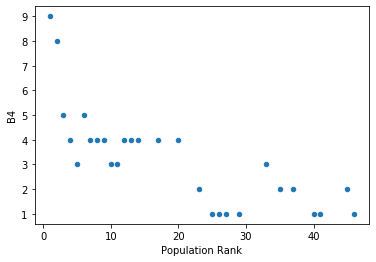

In [80]:
result2.plot.scatter(x = 'Population Rank', y = 'B4')

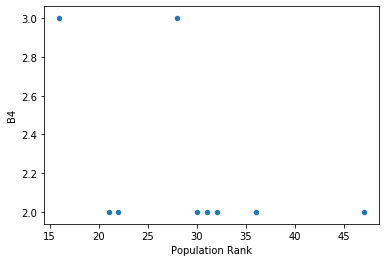

In [81]:
result.plot.scatter(x = 'Population Rank', y = 'B4')

In [53]:
import folium

In [77]:
m = folium.Map(location=[38, -90], zoom_start=4.3)

result2.apply(lambda row:folium.Marker(location=[row["Latitude"], row["Longitude"]]).add_to(m), axis=1)
result.apply(lambda row:folium.CircleMarker(location=[row["Latitude"], row["Longitude"]]).add_to(m), axis=1)

m

# Results

By looking at the chart and the map we can see that a few cities stand out and it is easy to eliminate a few cities as well. The first scatter plot has a curved negative correlation which makes sense as the better the population rank, the more sports teams are expected to be there. We can then expect that cities with the highest populations should be considered first for the new NBA franchise. 

The next chart follows a similar plot as the one before, with one outlier Pittsburg showing up. This might be due to the culture created in Pittsburg by their already successful teams which include the Steelers in the NFL and the Penguins in the NHL. The second graphs makes it seem like Seattle and Pittsburg should be high in the running for the next NBA franchise.

The final graph to look at is the folium map which has both current NBA cities and potential NBA cities. There is no clear overlab here besides the possibility of Washington, D.C which is very close to the potential city of Baltimore. Yet, with Baltimore being the 13th city in income rank and the 22nd city in population rank, it is hard to remove them from contention. Other than that, Kansas City and St. Louis are the furthest from the closest current NBA team and a new team at either of the two cities could see the fan bases merging.

# Discussion

As mentioned above, it is a very difficult decision and many factors that are not included in the data present would have to be taken into account. Through the data and what I know about the NBA, I believe that the next NBA franchise should be located in Seattle, Washington. Not only is Seattle the 16th highest city in population, but it is the 3rd highest income wise. Seattle is home of one of the fastest rising tech hubs and I would not be surprised to see some of the money made there go right into a new NBA team.

Not only is Seattle the best city to have a new franchise based on the data presented, but also because of factors outside the data. Seattle already use to have an NBA team with loyal fans up until 2008. Not only that, but the NHL also thought that Seattle was the perfect place to expand too as they have announced the 32nd team, the Seattle Kraken, to debut in the 2021-2022 season. A whole new area is being built which could host the next NBA franchise there as well.

# Conclusion

This was a fun project to work on my skills and learn some new ones as well. Working with messy data was difficult at first, but as time went on it was easier to clean and manipulate the dataset how I want to. In the future I probably would have looked at more numerical variables instead of categorical. If I were to expand on this data I would like to find a dataset that had data on NBA viewship and how those compared to the other major sports in the United States.